<a href="https://colab.research.google.com/github/ratul442/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Churn Reduction**

Project Description :
Churn (loss of customers to competition) is a problem for companies because it is more expensive to acquire a new customer than to keep your existing one from leaving. This problem statement is targeted at enabling churn reduction using analytics concepts. We have to Churn Rate on the basis of their usage data.

In [ ]:
import os        
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/churn-bigml-80.csv")
test = pd.read_csv("/content/churn-bigml-20.csv")

**Exploring Data**

In [ ]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Checking info of data as data types and rows n cols
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# All continous variables in cname
cname = train.columns[(train.dtypes=="float64")|(train.dtypes=="int64")].tolist()
print(cname)

# All categorical var in cat_names and removing target var
cat_names = train.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('Churn')
cat_names

['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


['State', 'International plan', 'Voice mail plan']

**Checking Missing Value in Data**

In [ ]:
#Checking missing values in train dataset
print(train.isnull().sum())  

#no missing value present in the train data

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [ ]:
#Checking missing values in test data set
print(test.isnull().sum())  

#no missing value present in the test data

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


**No missing value found in both train and test data set**

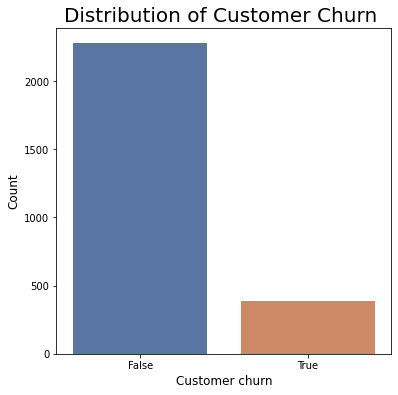

In [ ]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x = train.Churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churn ",fontsize= 20)
plt.show()

**It is clear that we have a Class Imbalance problem**

In [ ]:
#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    
    train.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

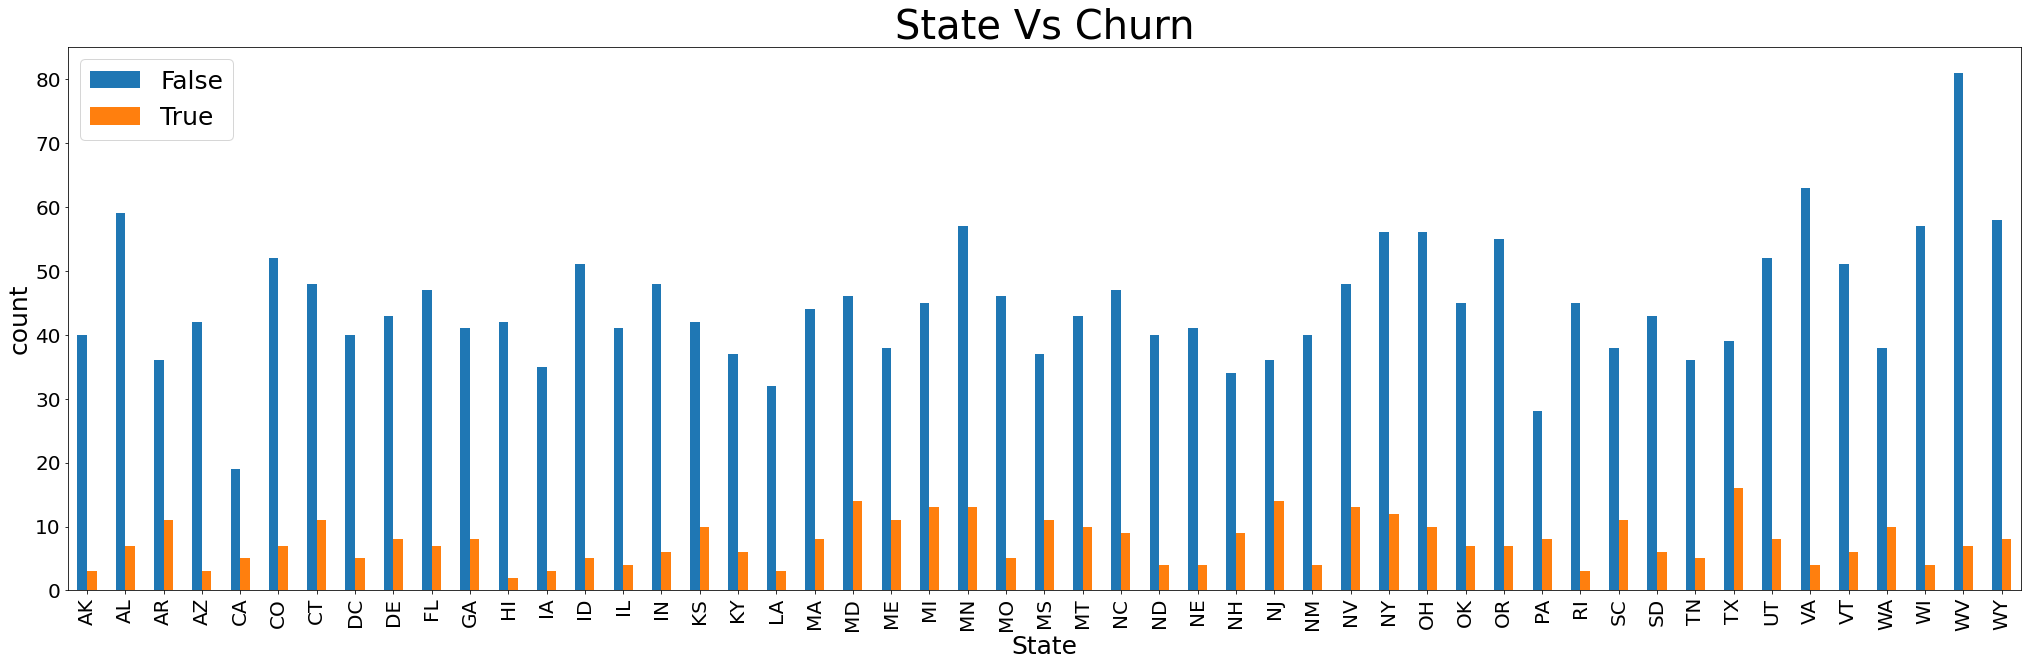

In [ ]:
#State Wise Churning of customer
diff_bar('State','Churn')

**Texas has the highest number of churn**

**WV state has the highest count of people not churning**

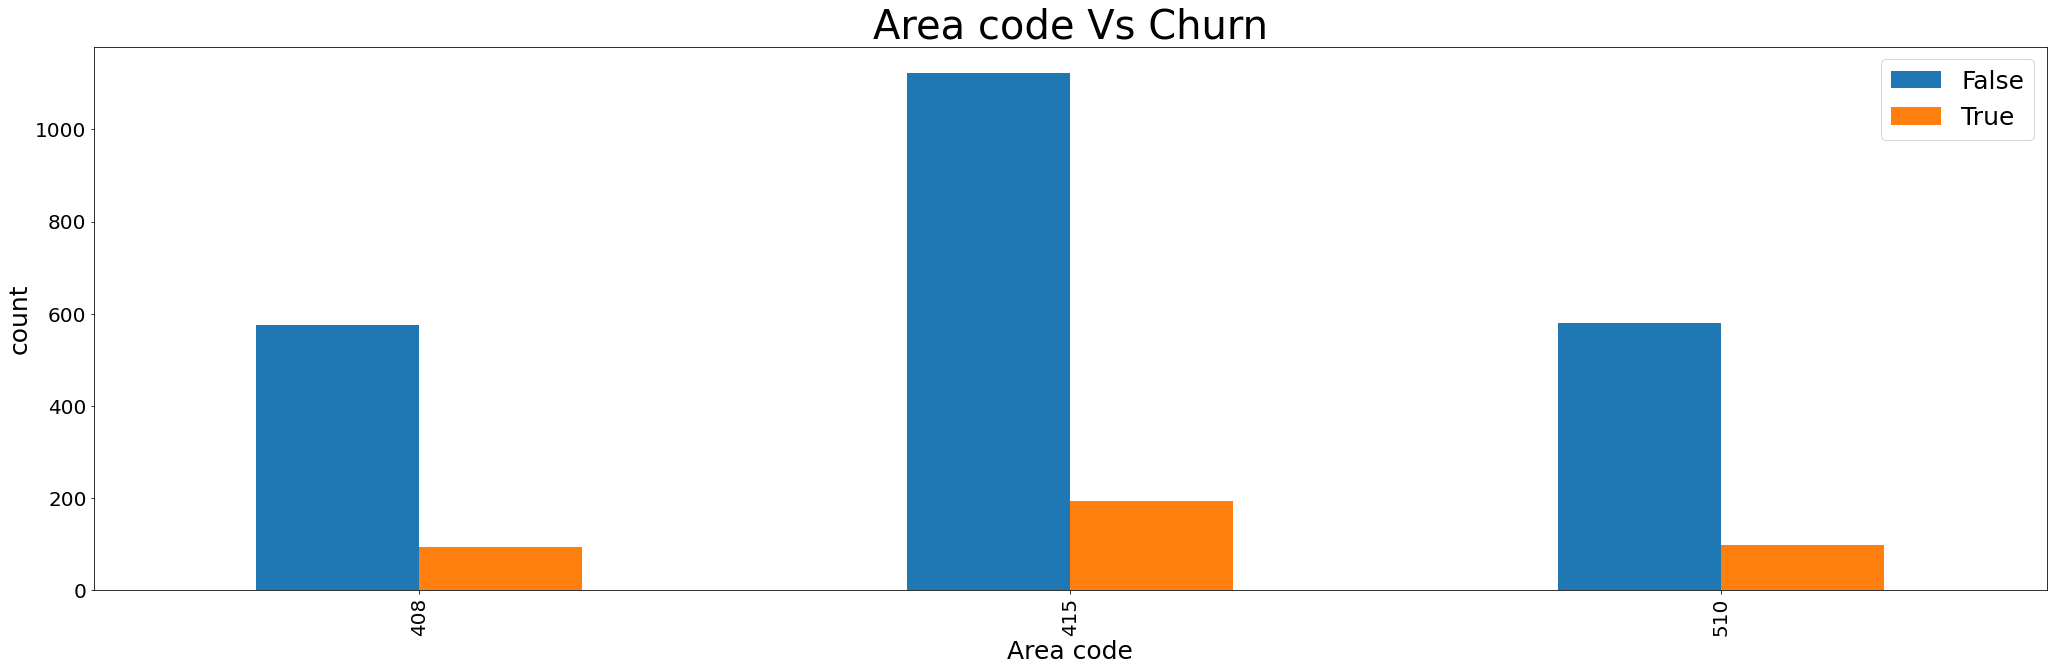

In [ ]:
# Area_code Wise Churning of customer
diff_bar('Area code','Churn')

**Area code 415 has the highest count of churn among others**

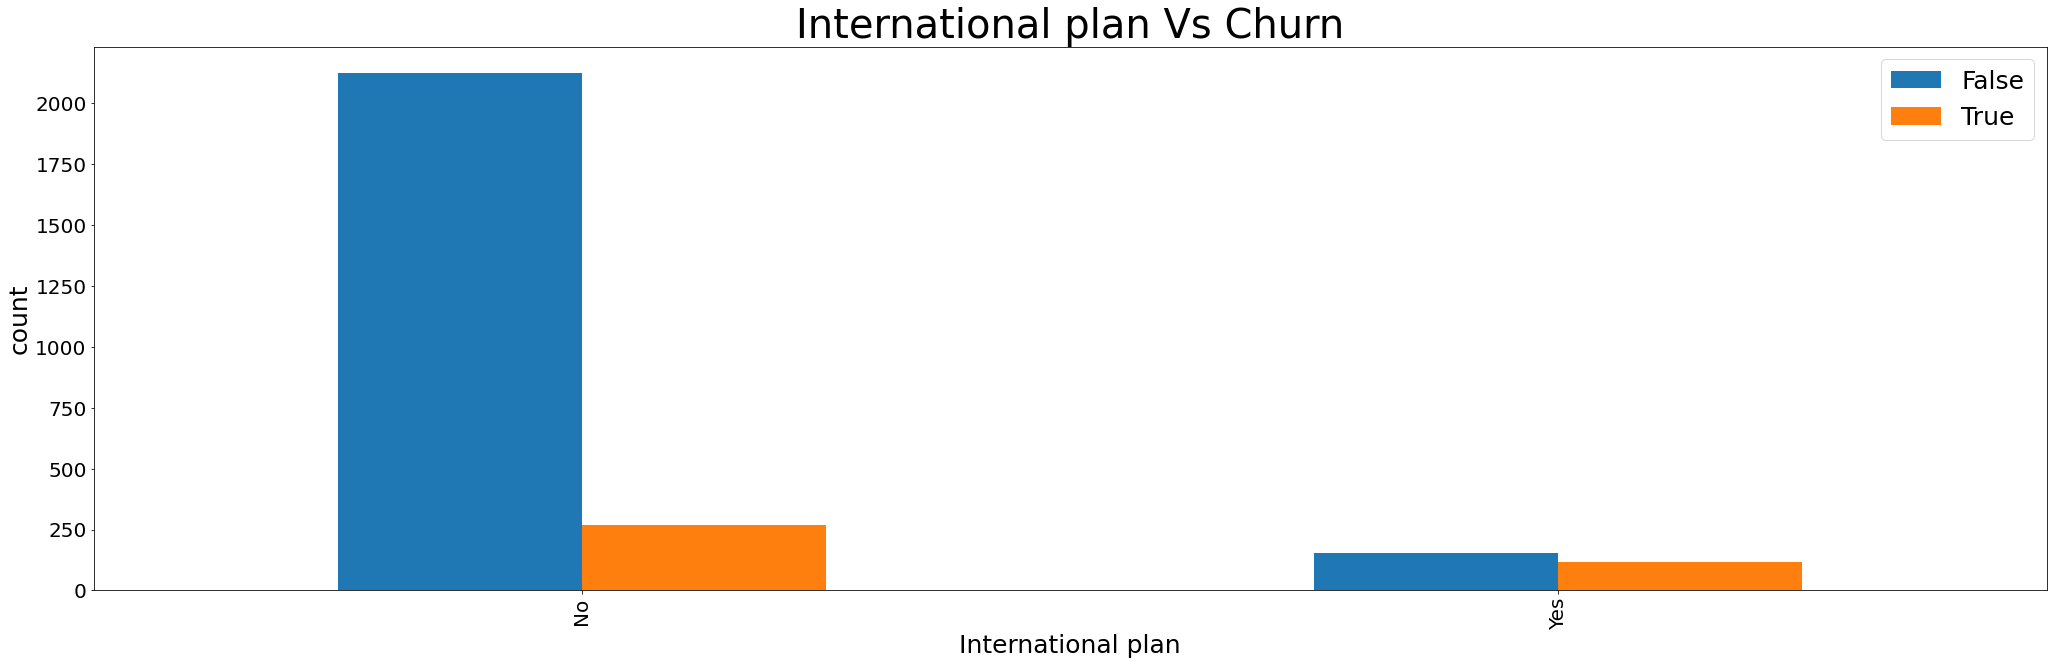

In [ ]:
#International_Plan Wise Churning of customer
diff_bar('International plan','Churn')

**People having no international plan are more churning**

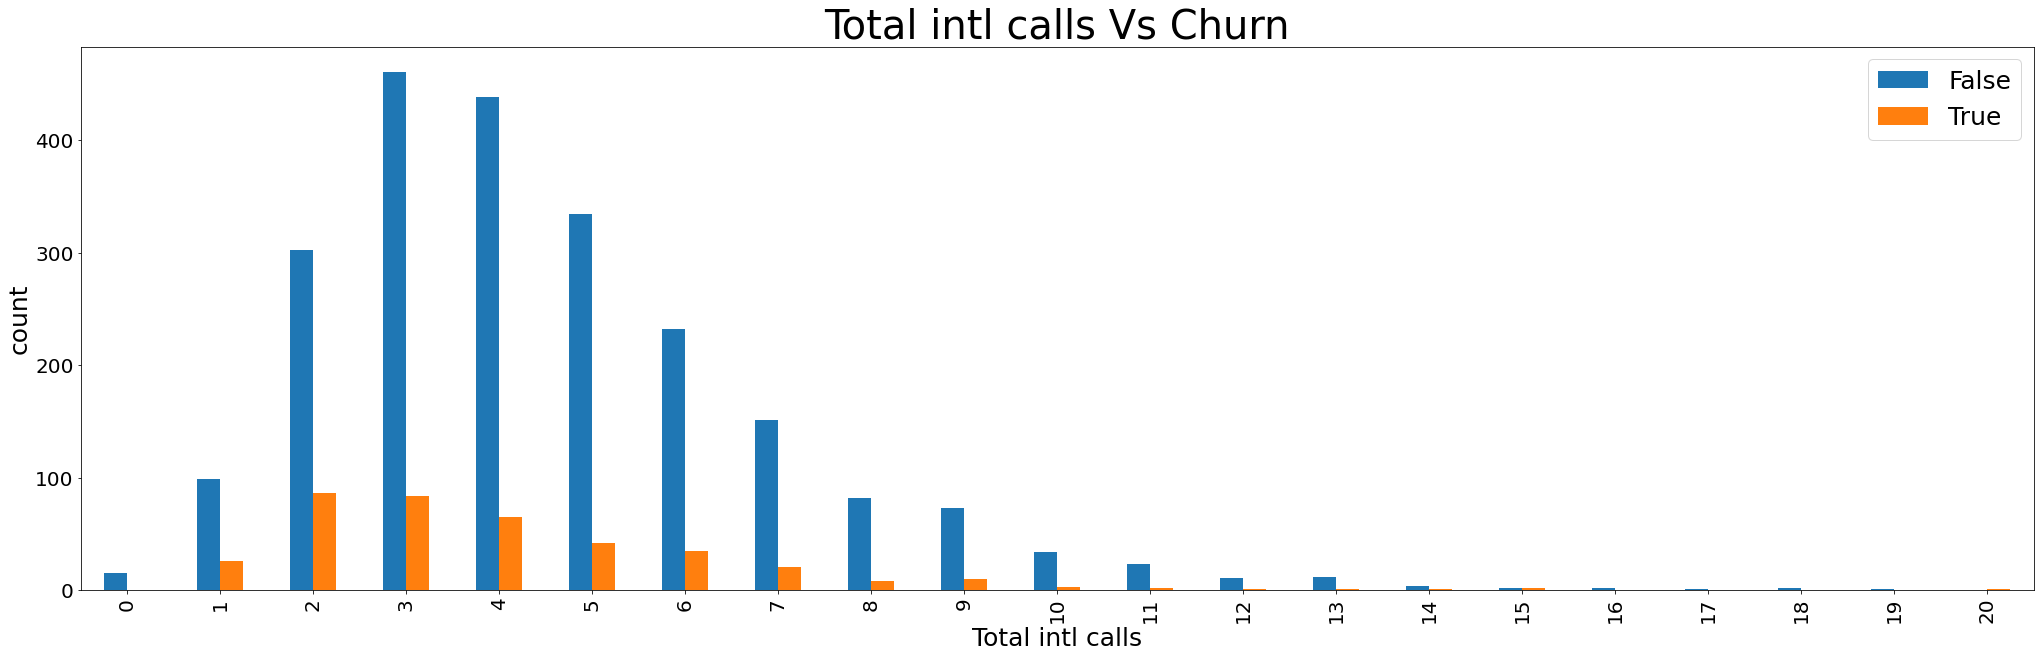

In [ ]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('Total intl calls','Churn')

**People making two international calls are churning the most**

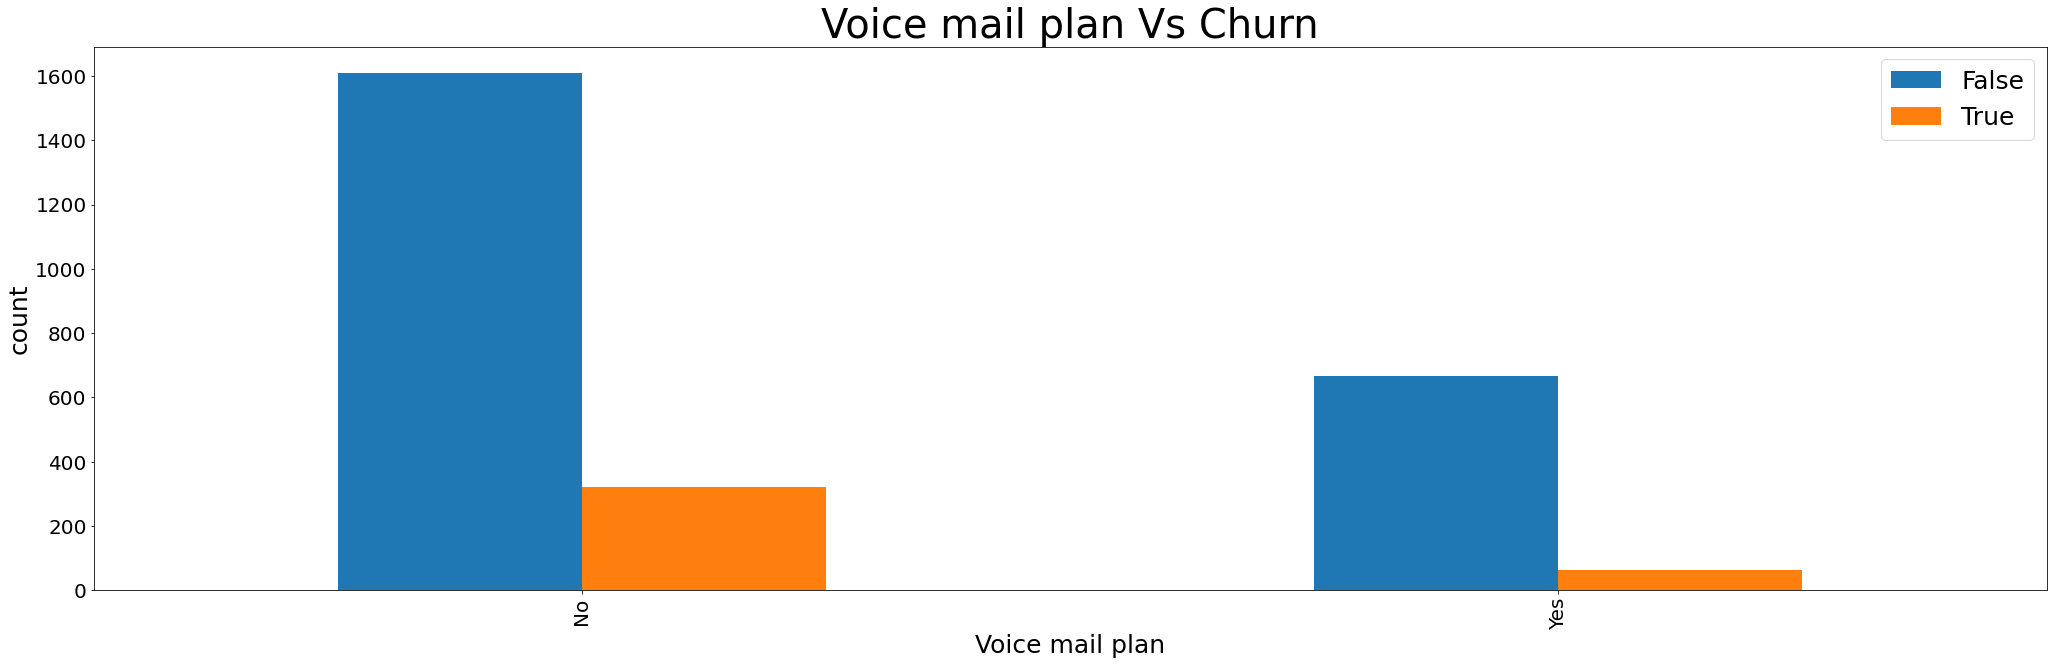

In [ ]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('Voice mail plan','Churn')

**People with no voice mail plan are churning the most**

**INSIGHTS FROM EDA**

1) We have a Class Imbalance problem

2) People with no voice mail plan are churning the most

3) People making two international calls are churning the most

4) Area code 415 has the highest count of churn among others

5) Texas has the highest number of churn

6) WV state has the highest count of people not churning

In [ ]:
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [ ]:
train = cat_to_num(train)
test = cat_to_num(test)

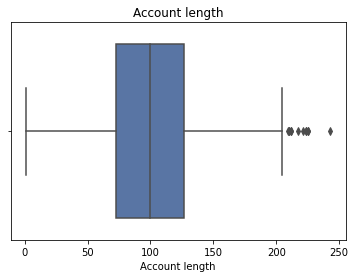

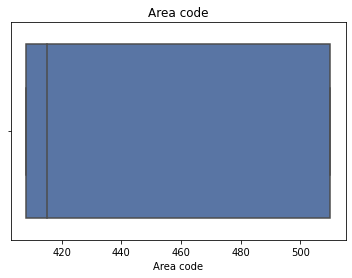

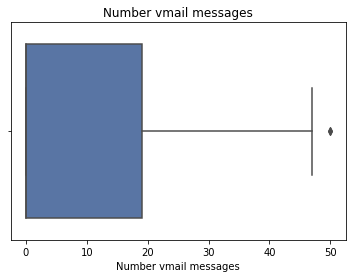

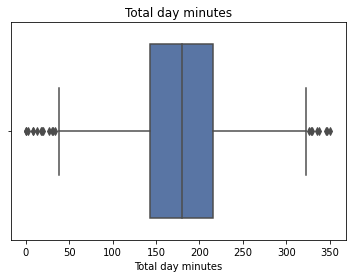

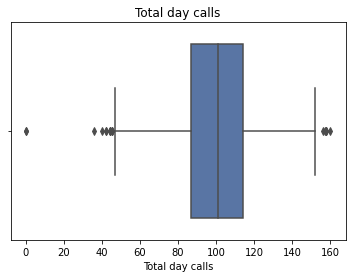

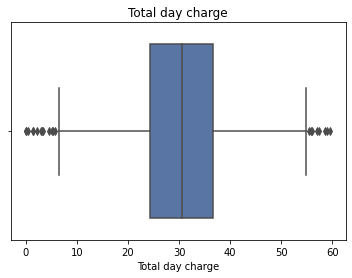

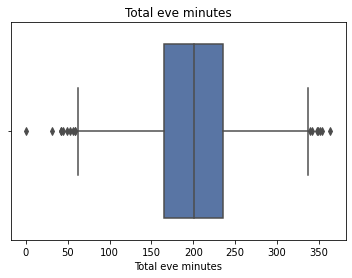

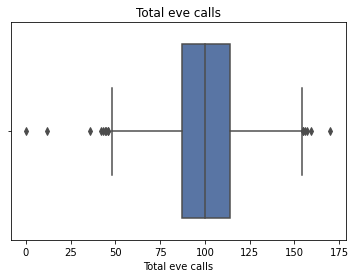

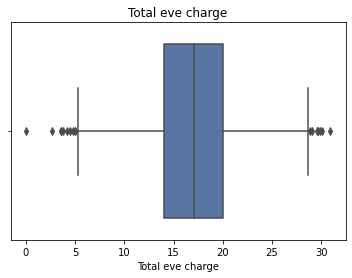

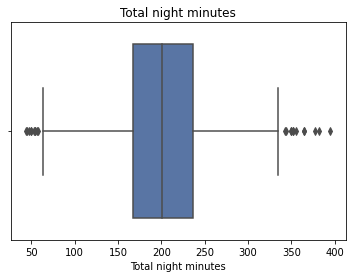

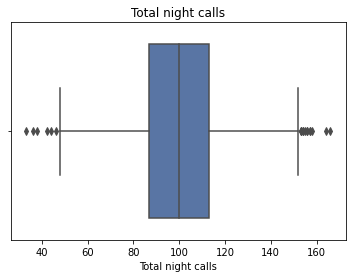

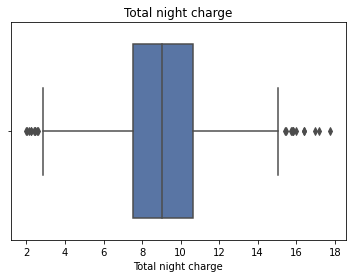

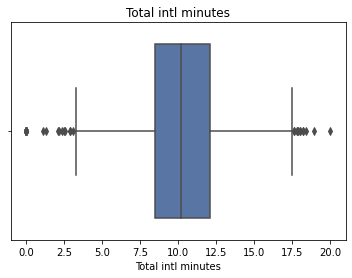

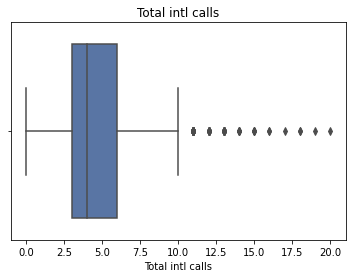

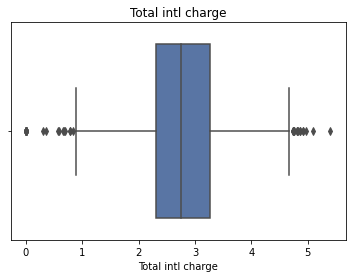

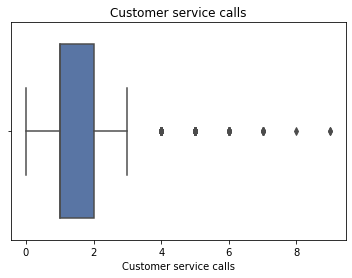

In [ ]:
# #Plotting Box Plot
for i in cname:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(train[i],palette="deep")
    plt.title(i)
    plt.show()

In [ ]:
#Treating Outliers and Converting them to nan
for i in cname:
    #print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    train.loc[train.loc[:,i] < minn,i] = np.nan
    train.loc[train.loc[:,i] > maxx,i] = np.nan
    print('{var} -----> {X}   Missing'.format(var = i, X = (train.loc[:,i].isnull().sum())))

Account length -----> 12   Missing
Area code -----> 0   Missing
Number vmail messages -----> 2   Missing
Total day minutes -----> 21   Missing
Total day calls -----> 18   Missing
Total day charge -----> 21   Missing
Total eve minutes -----> 17   Missing
Total eve calls -----> 15   Missing
Total eve charge -----> 17   Missing
Total night minutes -----> 22   Missing
Total night calls -----> 19   Missing
Total night charge -----> 22   Missing
Total intl minutes -----> 37   Missing
Total intl calls -----> 66   Missing
Total intl charge -----> 40   Missing
Customer service calls -----> 210   Missing


**Imputing nan with mean**

In [ ]:
for i in cname:
    print (i)
    train = train.apply(lambda x:x.fillna(train.loc[:,i].mean()))

Account length
Area code
Number vmail messages
Total day minutes
Total day calls
Total day charge
Total eve minutes
Total eve calls
Total eve charge
Total night minutes
Total night calls
Total night charge
Total intl minutes
Total intl calls
Total intl charge
Customer service calls


**Correlation plot**

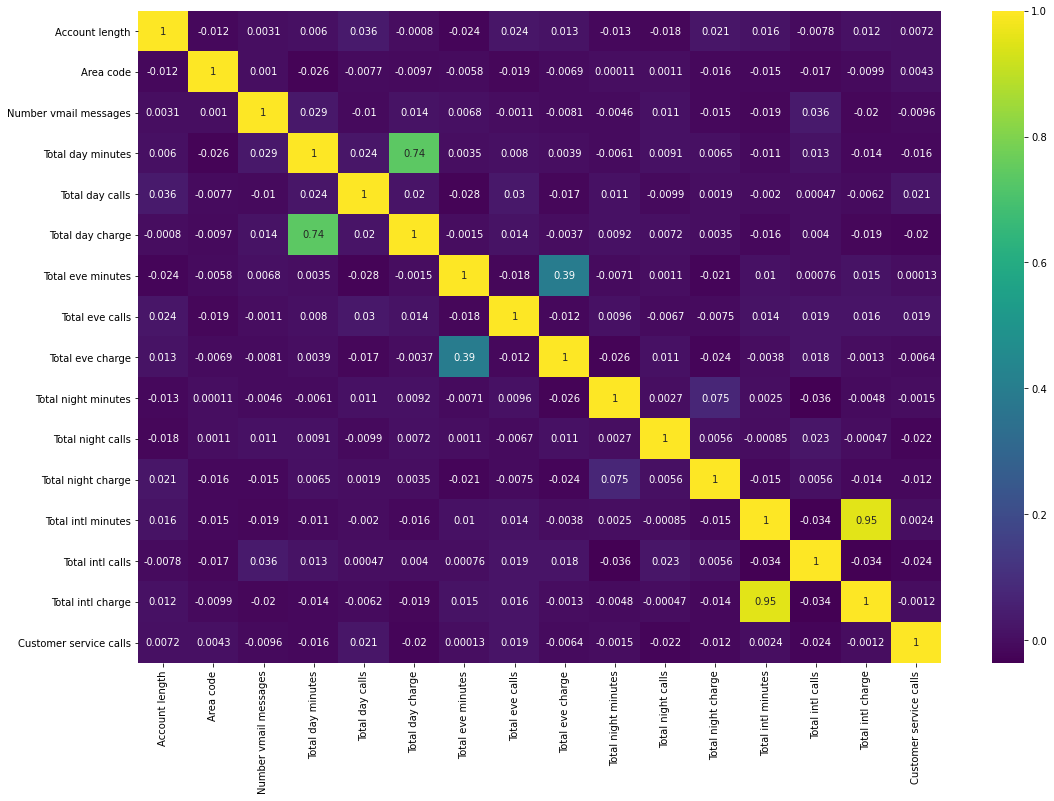

In [ ]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generating Corelation Matrix
corr = train[cname].corr()

#Plot using Seaborn library
sns.heatmap(corr, cmap = 'viridis',annot = True)

plt.show()

In [ ]:
train['International plan'].value_counts()

No     2396
Yes     270
Name: International plan, dtype: int64

**Chi-Square Test for Categorical variables**

In [ ]:
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(train['Churn'],train[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)

State
0.004680701679944942
International plan
5.4269405491147075e-46
Voice mail plan
4.079713016862758e-07


In [40]:
train.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [42]:
#Removing correlated variable & the variable which doesn't contain any meaning full info
rmev = ['State','Total day charge','Total eve charge','Total night charge','Total intl charge']
train = train.drop(rmev,axis=1)
test = test.drop(rmev,axis=1)

In [52]:
#Updating values _after removal of var
cname = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes',
         'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls',
         'Customer service calls']

#All categorical var and removing target var
cat_names = ['Area code', 'International plan', 'Voice mail plan']

**Feature Scaling**

Checking Distribution of data

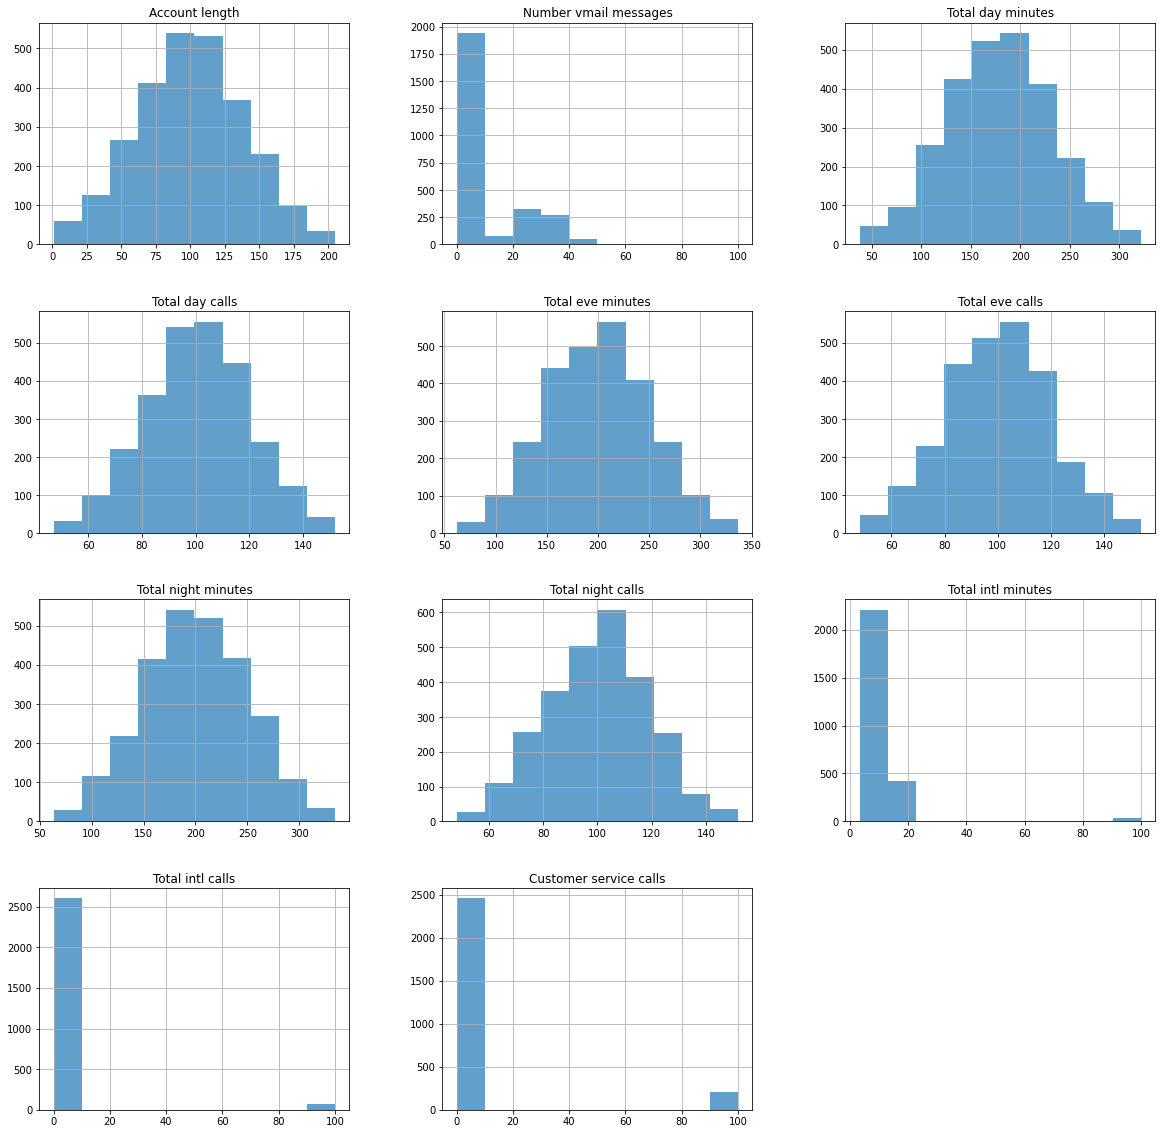

In [47]:
#Checking distribution of data via pandas visualization
train[cname].hist(figsize=(20,20),alpha = 0.7)
plt.show()

In [50]:
# #Histogram breaks down by target variable
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),label='True',bins='auto')
    plt.hist(list(x[y == 0]), alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()

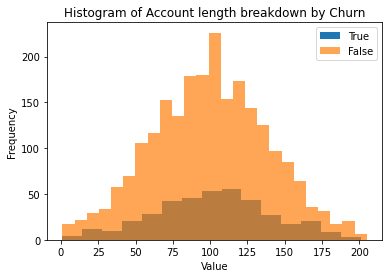

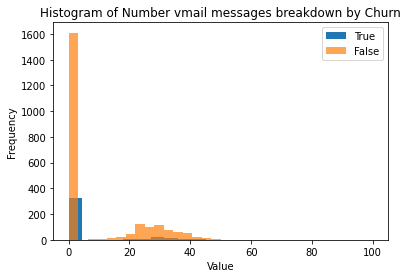

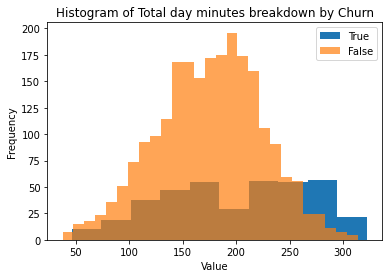

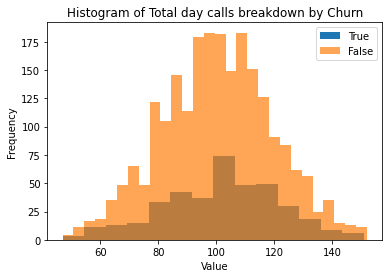

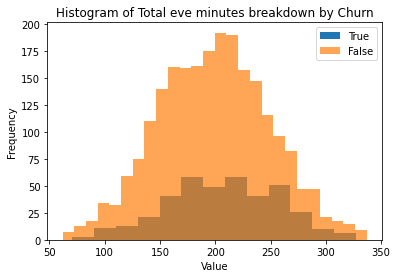

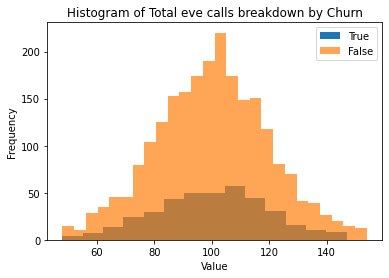

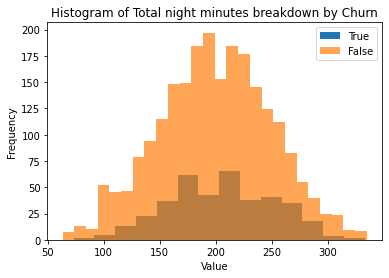

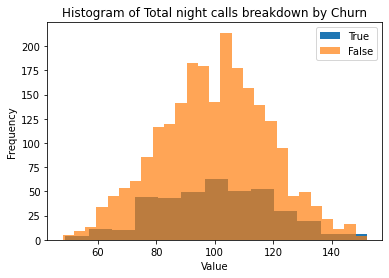

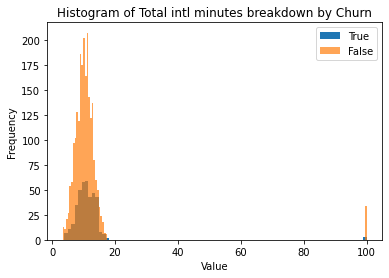

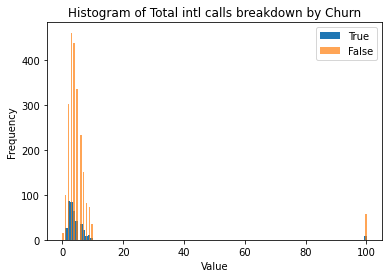

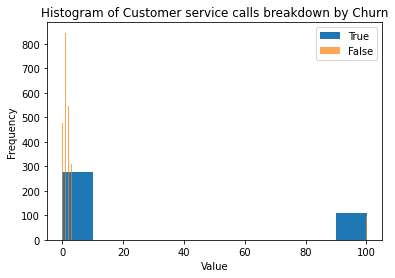

In [51]:
for i in cname:
    #print(i)
    plot_hist_y(train[i],train.Churn)

**As most of the feature is uniformally distributed , Hence Using data Standardization/Z-Score here**

In [53]:
# Applying standarization as most of the variables are normalized distributed

def scale_standard(df):
    for i in cname:
        #print(i)
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [54]:
#Standardizing Scale
train = scale_standard(train)
test = scale_standard(test)

In [55]:
train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,0.720517,415.0,0,1,1.227937,1.628935,0.494068,-0.050789,-0.056778,0.897325,-0.477096,-0.141922,-0.241433,-0.303629,False
1,0.178510,415.0,0,1,1.300422,-0.333271,1.168073,-0.088727,0.147483,1.092828,0.161438,0.200072,-0.241433,-0.303629,False
2,0.952806,415.0,0,0,-0.584177,1.217535,0.701454,-1.572293,0.504940,-0.757396,0.214649,0.061425,-0.108384,-0.341180,False
3,-0.415117,408.0,1,0,-0.584177,2.279212,-1.527946,-2.756351,-0.618497,-0.066081,-0.583518,-0.456187,0.024666,-0.266078,False
4,-0.647406,415.0,1,0,-0.584177,-0.236583,0.649608,-1.031181,1.117725,-0.267631,1.119239,-0.132679,-0.241433,-0.228527,False


**Sampling Data For Train and Test**

In [56]:
from sklearn.model_selection import train_test_split
#Using train test split functionality for creating sampling
X = train.iloc[:,:14]
y = train.iloc[:,14]
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 42)

In [57]:
(X_train.shape),(y_train.shape)

((1866, 14), (1866,))

In [58]:
!pip install imblearn

**Using SMOTE ( SMOTE: Synthetic Minority Over-sampling Technique)**

In [59]:
from imblearn.over_sampling import SMOTE

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train,y_train)

In [60]:
(X_train_res.shape,y_train_res.shape)

((3190, 14), (3190,))

**Predictions on Train data**

In [62]:
def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

**Random Forest Classifier Model**

In [63]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0   1
Churn         
0      665  18
1       34  83

Classification paradox :------->>
Accuracy :-  93.5

Specificity //  True Negative Rate :-  97.36

Sensivity // True Positive Rate // Recall :-  70.94

False Negative Rate :-  29.06

False Postive Rate :-  2.64

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       683
           1       0.82      0.71      0.76       117

    accuracy                           0.94       800
   macro avg       0.89      0.84      0.86       800
weighted avg       0.93      0.94      0.93       800



**Logistic Regression Model**

In [64]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      581  102
1       31   86

Classification paradox :------->>
Accuracy :-  83.38

Specificity //  True Negative Rate :-  85.07

Sensivity // True Positive Rate // Recall :-  73.5

False Negative Rate :-  26.5

False Postive Rate :-  14.93

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       683
           1       0.46      0.74      0.56       117

    accuracy                           0.83       800
   macro avg       0.70      0.79      0.73       800
weighted avg       0.88      0.83      0.85       800



**K Neighbors Classifier Model**

In [65]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      565  118
1       49   68

Classification paradox :------->>
Accuracy :-  79.12

Specificity //  True Negative Rate :-  82.72

Sensivity // True Positive Rate // Recall :-  58.12

False Negative Rate :-  41.88

False Postive Rate :-  17.28

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       683
           1       0.37      0.58      0.45       117

    accuracy                           0.79       800
   macro avg       0.64      0.70      0.66       800
weighted avg       0.84      0.79      0.81       800



**Gaussian Naive Bayes Model**

In [66]:
from sklearn.naive_bayes import GaussianNB
#Navie Model Development
Naive_model = GaussianNB().fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(Naive_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      459  224
1       19   98

Classification paradox :------->>
Accuracy :-  69.62

Specificity //  True Negative Rate :-  67.2

Sensivity // True Positive Rate // Recall :-  83.76

False Negative Rate :-  16.24

False Postive Rate :-  32.8

              precision    recall  f1-score   support

           0       0.96      0.67      0.79       683
           1       0.30      0.84      0.45       117

    accuracy                           0.70       800
   macro avg       0.63      0.75      0.62       800
weighted avg       0.86      0.70      0.74       800



In [67]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

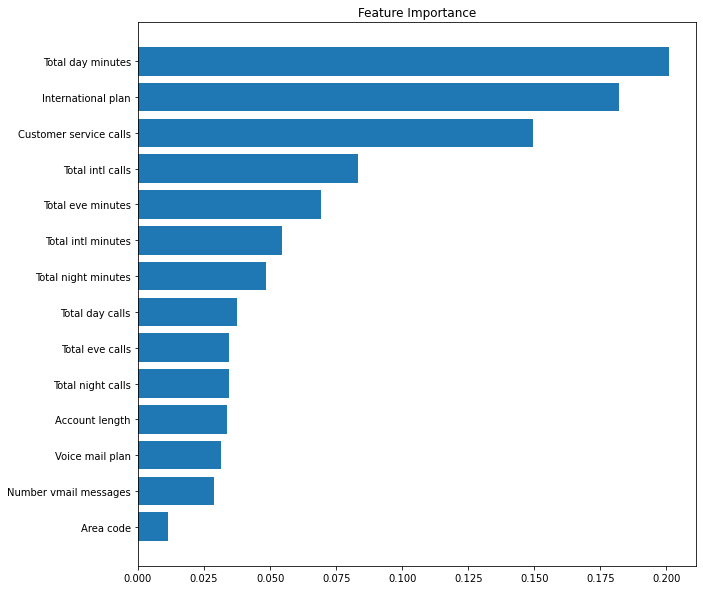

In [68]:
#Calculating feature importances
importances = final_Model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [train.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(X.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X.shape[1]), names)
plt.show()

**Total day minutes has the highest feature importance score**

ROC AUC: 0.88


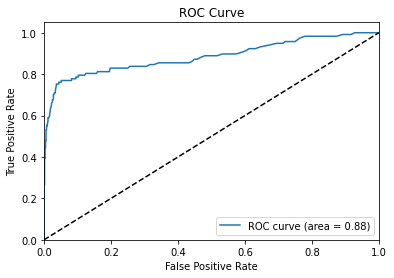

In [69]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, final_Model.predict_proba(X_test)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**We are getting ROC-AUC score of 0.88 on the train data**

**Final Test Data Predictions**

In [70]:
# #Test Data Spliting parts target and Predictors
XX = test.iloc[:,:14].values  #predictors
yy = test.iloc[:,14].values   #target
yy=yy.astype('int')

In [71]:
#Predicting test data 
#pred(model_object=final_Model,predictors=XX,compare=yy)

Churn_Pred = final_Model.predict(XX)
cm = pd.crosstab(yy,Churn_Pred)
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
print("CONFUSION MATRIX ----->> ")
print(cm)
print()
##check accuracy of model
print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

CONFUSION MATRIX ----->> 
col_0    0   1
row_0         
0      536  36
1       34  61

Accuracy :-  89.51
False Negative Rate :-  35.79
False Postive Rate :-  6.29


In [72]:
print(classification_report(yy,Churn_Pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       572
           1       0.63      0.64      0.64        95

    accuracy                           0.90       667
   macro avg       0.78      0.79      0.79       667
weighted avg       0.90      0.90      0.90       667



ROC AUC: 0.90


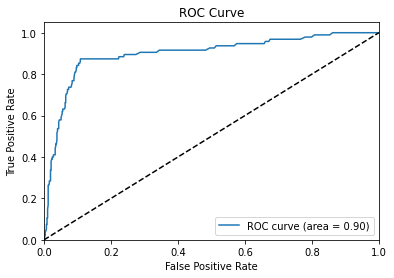

In [73]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(yy, final_Model.predict_proba(XX)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**We are getting ROC-AUC score of 0.90 on the test data**

**Predictions on Test data**

In [84]:
test_original = pd.read_csv("/content/churn-bigml-20.csv")
#output
test_original['Churn Prediction'] = Churn_Pred
test_original['Churn Prediction'] = test_original['Churn Prediction'].map({1 : 'True', 0 : 'False'})

#Predicted _Output
prob_output = pd.DataFrame(data=final_Model.predict_proba(XX),columns=("False_Probability","True_Probability"))
prob_output.head()

output = test_original[['State','Area code','Total day minutes',
       'Total day calls','International plan','Voice mail plan','Churn Prediction']]

In [85]:
output.head()

,State,Area code,Total day minutes,Total day calls,International plan,Voice mail plan,Churn Prediction
0,LA,408,184.5,97,No,No,False
1,IN,415,129.1,137,No,No,True
2,NY,415,332.9,67,No,No,True
3,SC,415,110.4,103,No,No,False
4,HI,510,119.3,117,No,No,False


In [86]:
output.to_csv('ChurnResult_Test',sep='\t', encoding='utf-8')
#Saving with Class and Probabilities
output.join(prob_output).to_csv('ChurnResult_Prob_Output.csv',sep='\t', encoding='utf-8')

In [87]:
output.head()

,State,Area code,Total day minutes,Total day calls,International plan,Voice mail plan,Churn Prediction
0,LA,408,184.5,97,No,No,False
1,IN,415,129.1,137,No,No,True
2,NY,415,332.9,67,No,No,True
3,SC,415,110.4,103,No,No,False
4,HI,510,119.3,117,No,No,False


In [88]:
data = pd.read_csv('ChurnResult_Prob_Output.csv',sep='\t', encoding='utf-8')

In [89]:
data

,Unnamed: 0,State,Area code,Total day minutes,Total day calls,International plan,Voice mail plan,Churn Prediction,False_Probability,True_Probability
0,0,LA,408,184.5,97,No,No,False,0.744,0.256
1,1,IN,415,129.1,137,No,No,True,0.430,0.570
2,2,NY,415,332.9,67,No,No,True,0.436,0.564
3,3,SC,415,110.4,103,No,No,False,0.736,0.264
4,4,HI,510,119.3,117,No,No,False,0.796,0.204
...,...,...,...,...,...,...,...,...,...,...
662,662,WI,415,137.1,88,No,Yes,False,0.782,0.218
663,663,AL,408,83.6,131,No,Yes,False,0.890,0.110
664,664,VT,415,193.9,118,No,No,False,0.790,0.210
665,665,WV,415,169.8,114,No,No,False,0.676,0.324
